In [23]:
%%cmd
pip install pandas matplotlib numpy seaborn category-encoders

Microsoft Windows [Version 10.0.22631.3447]
(c) Microsoft Corporation. All rights reserved.

(base) C:\Users\User\Machine Learning Codes>pip install pandas matplotlib numpy seaborn category-encoders

(base) C:\Users\User\Machine Learning Codes>

<h1>1. Import Libraries and Read Data</h1>

In [231]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('cwdata.csv')

<h1>2. Exploratory data analysis (EDA) and Pre-proccesing</h1>

In [232]:
df.head()

,Income,Area,Employed,Home Owner,Make,Model,Gender,Age,Colour,Stolen
0,12500,Urban,NaN,N,Toyota,Auris,F,25,Yellow,N
1,76300,R,Y,Y,BMW,3 series,Male,25,Black,Yes
2,52340,Rural,N,Yes,Mercedes,C Class,F,25,Grey,1
3,150600,Rural,Y,Y,BMW,3 series,F,19,White,Y
4,50000,Rural,Yes,1,Volkswagon,Golf,Male,55,Black,Yes


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Income      120 non-null    int64 
 1   Area        120 non-null    object
 2   Employed    118 non-null    object
 3   Home Owner  120 non-null    object
 4   Make        120 non-null    object
 5   Model       119 non-null    object
 6   Gender      120 non-null    object
 7   Age         120 non-null    object
 8   Colour      120 non-null    object
 9   Stolen      120 non-null    object
dtypes: int64(1), object(9)
memory usage: 9.5+ KB


In [234]:
#remove rows with null values
print("Before\n", df.isnull().sum())

df['Home Owner'] = df['Home Owner'].str.strip()
df['Age'] = df['Age'].str.strip()
df.replace('', np.nan, inplace=True)
df = df.dropna()

print("\nAfter\n" ,df.isnull().sum())

Before
 Income        0
Area          0
Employed      2
Home Owner    0
Make          0
Model         1
Gender        0
Age           0
Colour        0
Stolen        0
dtype: int64

After
 Income        0
Area          0
Employed      0
Home Owner    0
Make          0
Model         0
Gender        0
Age           0
Colour        0
Stolen        0
dtype: int64


In [235]:
# remove duplicates
duplicate_row_count = df.duplicated(keep=False).sum()
print("Before: No of duplicates: ", duplicate_row_count)

df = df.drop_duplicates()

duplicate_row_count = df.duplicated(keep=False).sum()
print("After: No of duplicates: ", duplicate_row_count)

Before: No of duplicates:  4
After: No of duplicates:  0


In [236]:
# pre-process Area column
unique_values = df['Area'].unique()
print("Before: ",unique_values)

df['Area'] = df['Area'].replace(['R', 'Rurak', 'r'], 'Rural')
df['Area'] = df['Area'].replace(['U', 'U ', 'u'], 'Urban')

unique_values = df['Area'].unique()
print("After: ",unique_values)

Before:  ['R' 'Rural' 'U ' 'U' 'u' 'Urban' 'r' 'Rurak']
After:  ['Rural' 'Urban']


In [237]:
# pre-process Employed column
unique_values = df['Employed'].unique()
print("Before: ",unique_values)

df['Employed'] = df['Employed'].replace(['Y', 'Yes', 'y'], '1')
df['Employed'] = df['Employed'].replace(['N', 'No'], '0')

unique_values = df['Employed'].unique()
print("Employed: ",unique_values)

Before:  ['Y' 'N' 'Yes' 'No' '1' '0' 'y']
Employed:  ['1' '0']


In [238]:
# pre-process Home Owner column
unique_values = df['Home Owner'].unique()
print("Before: ",unique_values)

df['Home Owner'] = df['Home Owner'].replace(['Y', 'Yes', 'y'], '1')
df['Home Owner'] = df['Home Owner'].replace(['N', 'No', 'n'], '0')

unique_values = df['Home Owner'].unique()
print("Home Owner: ",unique_values)


Before:  ['Y' 'Yes' '1' 'No' 'N' 'n' 'y']
Home Owner:  ['1' '0']


In [239]:
# pre-process Gender column
unique_values = df['Gender'].unique()
print("Before: ",unique_values)

df['Gender'] = df['Gender'].replace(['Female'], 'F')
df['Gender'] = df['Gender'].replace(['Male'], 'M')

unique_values = df['Gender'].unique()
print("Gender: ",unique_values)

Before:  ['Male' 'F' 'Female' 'M' 'PNS']
Gender:  ['M' 'F' 'PNS']


In [240]:
# pre-process Stolen column
unique_values = df['Stolen'].unique()
print("Before: ",unique_values)

df['Stolen'] = df['Stolen'].replace(['Y', 'Yes', 'y'], '1')
df['Stolen'] = df['Stolen'].replace(['N', 'No', 'n'], '0')

unique_values = df['Stolen'].unique()
print("Stolen: ",unique_values)


Before:  ['Yes' '1' 'Y' 'N' 'No' '0' 'n']
Stolen:  ['1' '0']


In [241]:
df['Stolen'] = df['Stolen'].astype(int)

In [242]:
import category_encoders as ce

#target encoding for Make
encoder = ce.TargetEncoder(cols="Make")
encode = encoder.fit_transform(df["Make"], df['Stolen'])
df['Make_encoded'] = encode

#target encoding for Model
encoder = ce.TargetEncoder(cols="Model")
encode = encoder.fit_transform(df["Model"], df['Stolen'])
df['Model_encoded'] = encode

#target encoding for Colour
encoder = ce.TargetEncoder(cols="Colour")
encode = encoder.fit_transform(df["Colour"], df['Stolen'])
df['Colour_encoded'] = encode


In [243]:
df.drop(columns=['Stolen'], inplace=True)

In [244]:
df = pd.get_dummies(df, columns = ['Area', 'Gender'])
df

,Income,Employed,Home Owner,Make,Model,Age,Colour,Make_encoded,Model_encoded,Colour_encoded,Area_Rural,Area_Urban,Gender_F,Gender_M,Gender_PNS
1,76300,1,1,BMW,3 series,25,Black,0.724335,0.671864,0.636426,1,0,0,1,0
2,52340,0,1,Mercedes,C Class,25,Grey,0.781637,0.839302,0.730908,1,0,1,0,0
3,150600,1,1,BMW,3 series,19,White,0.724335,0.671864,0.605945,1,0,1,0,0
4,50000,1,1,Volkswagon,Golf,55,Black,0.469049,0.511391,0.636426,1,0,0,1,0
5,15000,1,1,Peugeot,107,54,Yellow,0.375234,0.403349,0.411740,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41230,0,1,Mercedes,C Class,37,White,0.781637,0.839302,0.605945,1,0,0,1,0
116,54560,0,1,BMW,2 Series,32,Yellow,0.724335,0.433991,0.411740,1,0,1,0,0
117,46540,0,1,Fiat,Punto,32,Red,0.433991,0.433991,0.294847,1,0,0,1,0
118,5450,1,1,Volkswagon,Polo,54,Black,0.469049,0.440466,0.636426,1,0,1,0,0


In [245]:
df['Employed'] = df['Employed'].astype(int)
df['Home Owner'] = df['Home Owner'].astype(int)
df["Age"] = df['Age'].astype(int)

df.drop(['Make', 'Model', 'Colour'], axis=1, inplace=True)
df.dtypes

Income              int64
Employed            int32
Home Owner          int32
Age                 int32
Make_encoded      float64
Model_encoded     float64
Colour_encoded    float64
Area_Rural          uint8
Area_Urban          uint8
Gender_F            uint8
Gender_M            uint8
Gender_PNS          uint8
dtype: object

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 1 to 119
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          113 non-null    int64  
 1   Employed        113 non-null    int32  
 2   Home Owner      113 non-null    int32  
 3   Age             113 non-null    int32  
 4   Make_encoded    113 non-null    float64
 5   Model_encoded   113 non-null    float64
 6   Colour_encoded  113 non-null    float64
 7   Area_Rural      113 non-null    uint8  
 8   Area_Urban      113 non-null    uint8  
 9   Gender_F        113 non-null    uint8  
 10  Gender_M        113 non-null    uint8  
 11  Gender_PNS      113 non-null    uint8  
dtypes: float64(3), int32(3), int64(1), uint8(5)
memory usage: 6.3 KB


In [247]:
df.columns

Index(['Income', 'Employed', 'Home Owner', 'Age', 'Make_encoded',
       'Model_encoded', 'Colour_encoded', 'Area_Rural', 'Area_Urban',
       'Gender_F', 'Gender_M', 'Gender_PNS'],
      dtype='object')

In [248]:
df.describe()

,Income,Employed,Home Owner,Age,Make_encoded,Model_encoded,Colour_encoded,Area_Rural,Area_Urban,Gender_F,Gender_M,Gender_PNS
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,44562.778761,0.548673,0.814159,34.539823,0.602677,0.605783,0.559648,0.725664,0.274336,0.469027,0.477876,0.053097
std,27388.134741,0.499842,0.390711,11.217839,0.184106,0.177545,0.148175,0.448167,0.448167,0.501263,0.501735,0.225226
min,0.000000,0.000000,0.000000,18.000000,0.319492,0.385089,0.294847,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32250.000000,0.000000,1.000000,25.000000,0.403349,0.440466,0.411740,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43560.000000,1.000000,1.000000,32.000000,0.724335,0.660432,0.605945,1.000000,0.000000,0.000000,0.000000,0.000000
75%,54000.000000,1.000000,1.000000,43.000000,0.781637,0.839302,0.636426,1.000000,1.000000,1.000000,1.000000,0.000000
max,156000.000000,1.000000,1.000000,65.000000,0.781637,0.839302,0.730908,1.000000,1.000000,1.000000,1.000000,1.000000


<h1>3. Scaling The Data</h1>

In [285]:
#Scaling Income, Age, Make_encoded, Model_encoded, Colour_encoded Values
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Income', 'Age']]

X_scaled = scale.fit_transform(X)

# Find the minimum value of each feature
min_values = X_scaled.min(axis=0)

# Subtract the minimum value from each scaled feature
df[['Income', 'Age']] = X_scaled - min_values

print(df[['Income', 'Age']])

       Income       Age
1    2.798287  0.626786
2    1.919559  0.626786
3    5.523225  0.089541
4    1.833740  3.313010
5    0.550122  3.223469
..        ...       ...
115  1.512102  1.701275
116  2.000977  1.253571
117  1.706845  1.253571
118  0.199878  3.223469
119  3.099021  1.253571

[113 rows x 2 columns]


<h1>4. Unsupervised Learning Algorithms</h1>

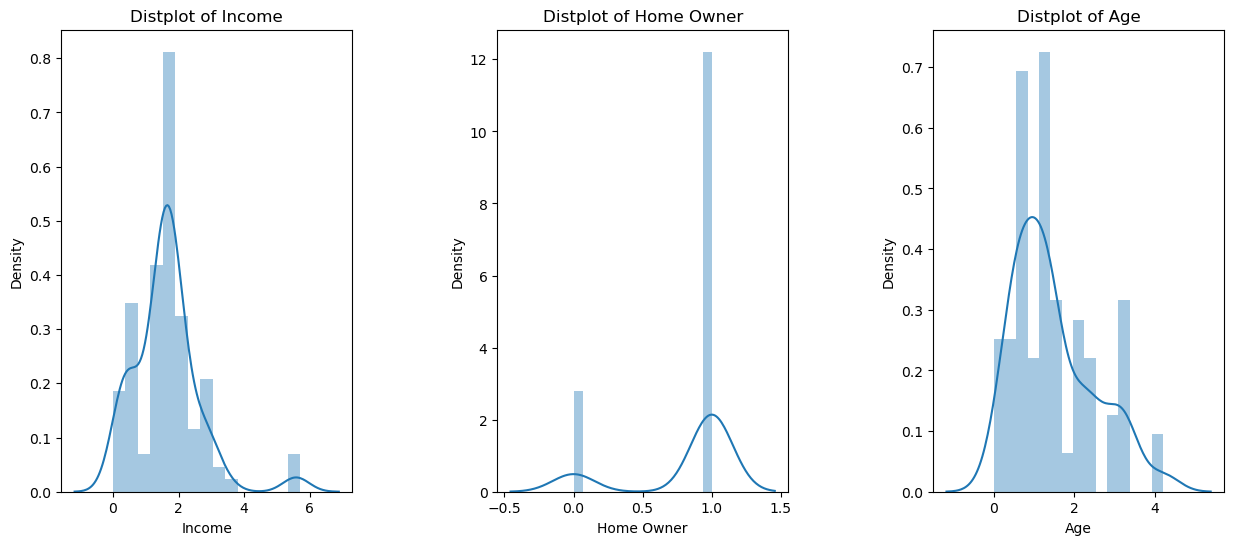

In [286]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Income' , 'Home Owner' , 'Age']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

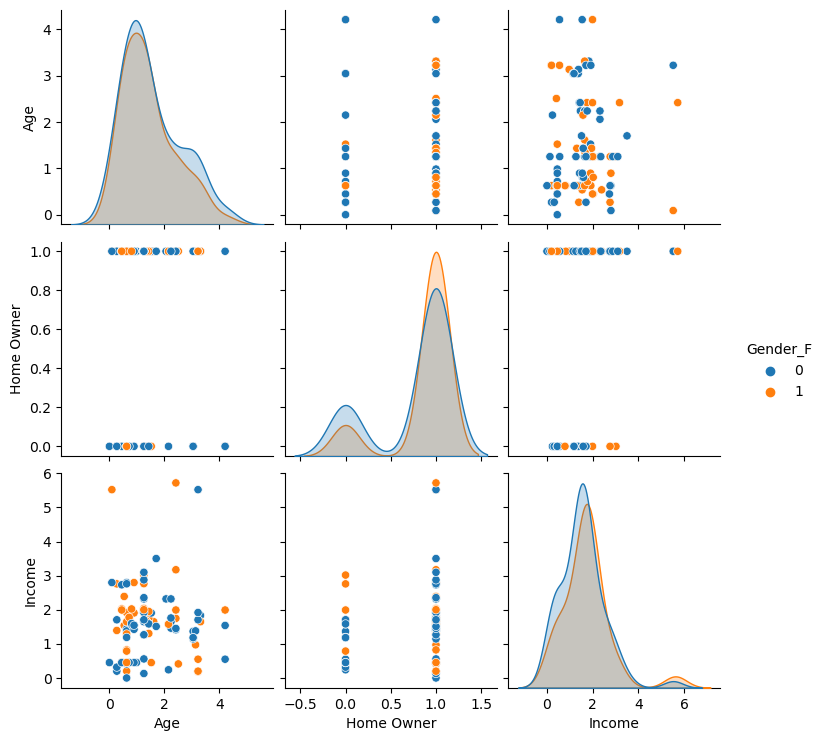

In [287]:
sns.pairplot(df, vars = ['Age', 'Home Owner', 'Income'], hue = "Gender_F")

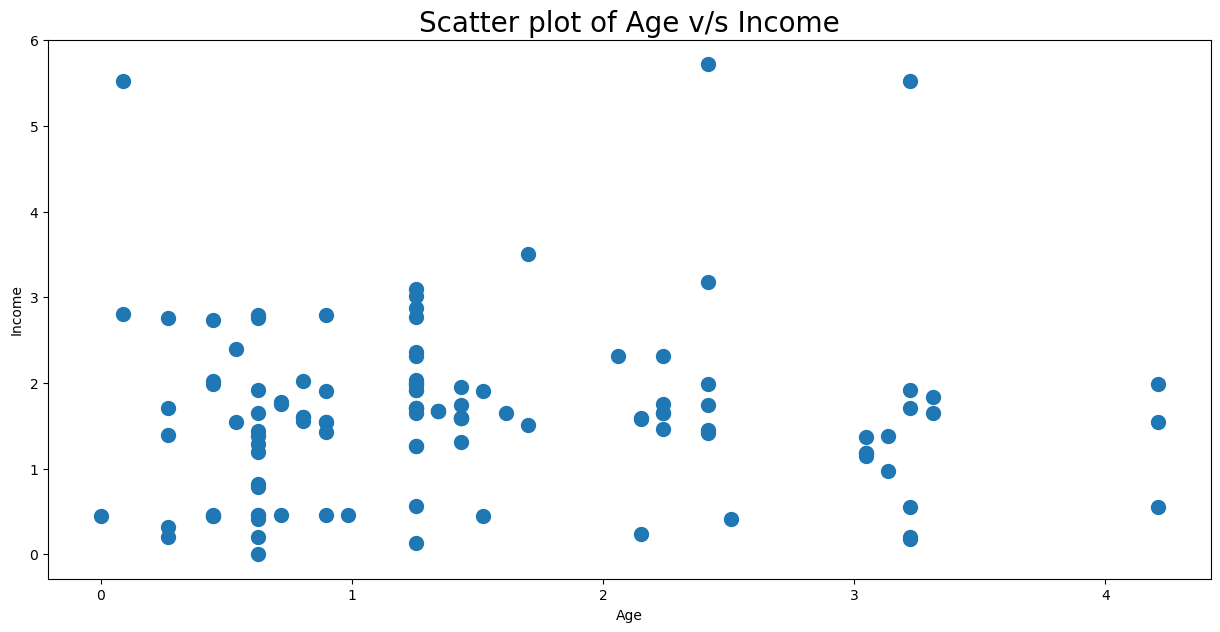

In [288]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Income', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter( x = 'Age', y = 'Income', data = df, s = 100)
plt.show()

In [289]:
X1 = df[['Age' , 'Income']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

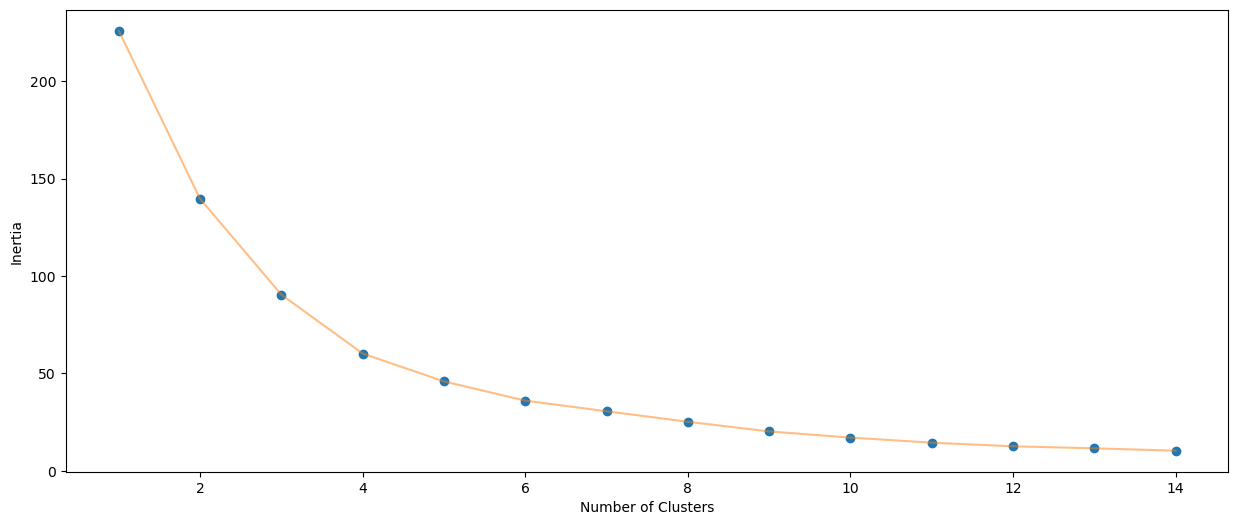

In [290]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [291]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [292]:
h = 0.01
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

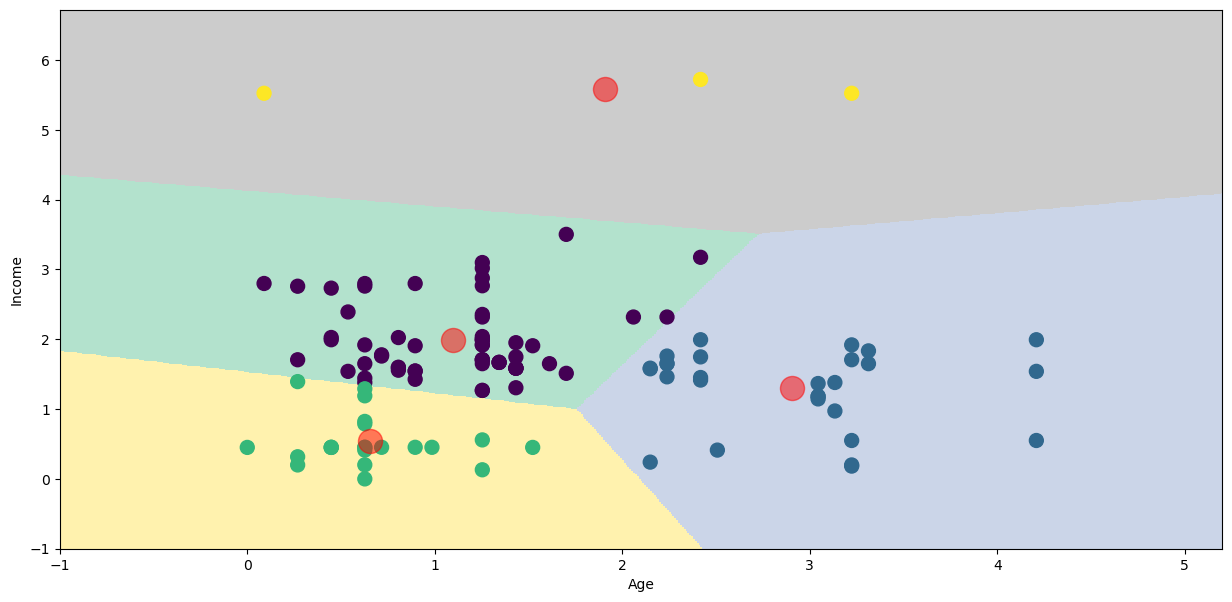

In [293]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Income', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Income') , plt.xlabel('Age')
plt.show()

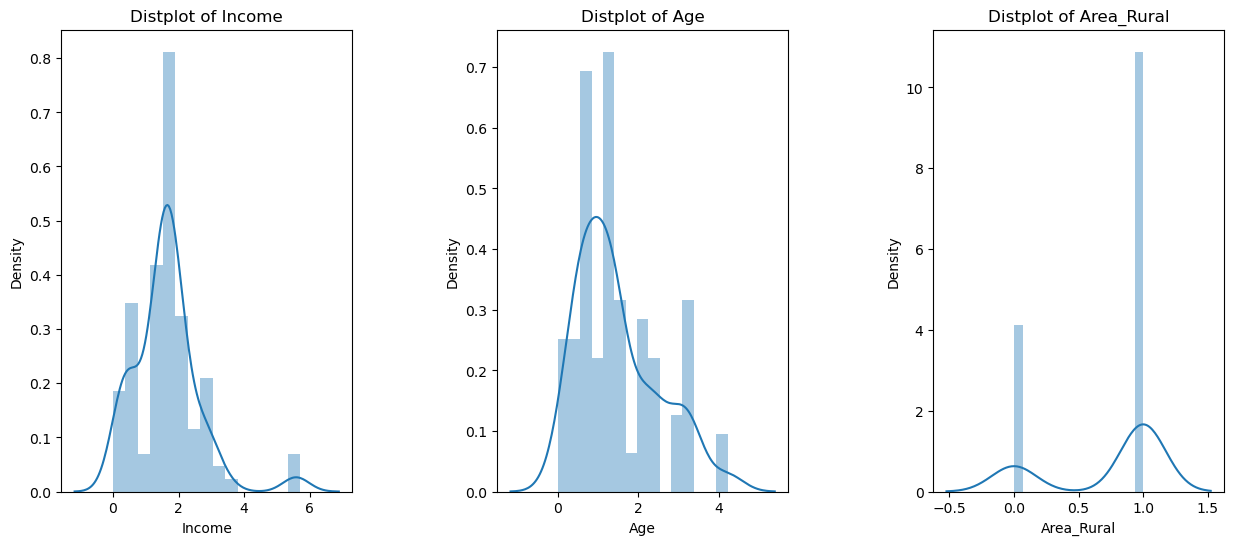

In [294]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Income' , 'Age' , 'Area_Rural']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

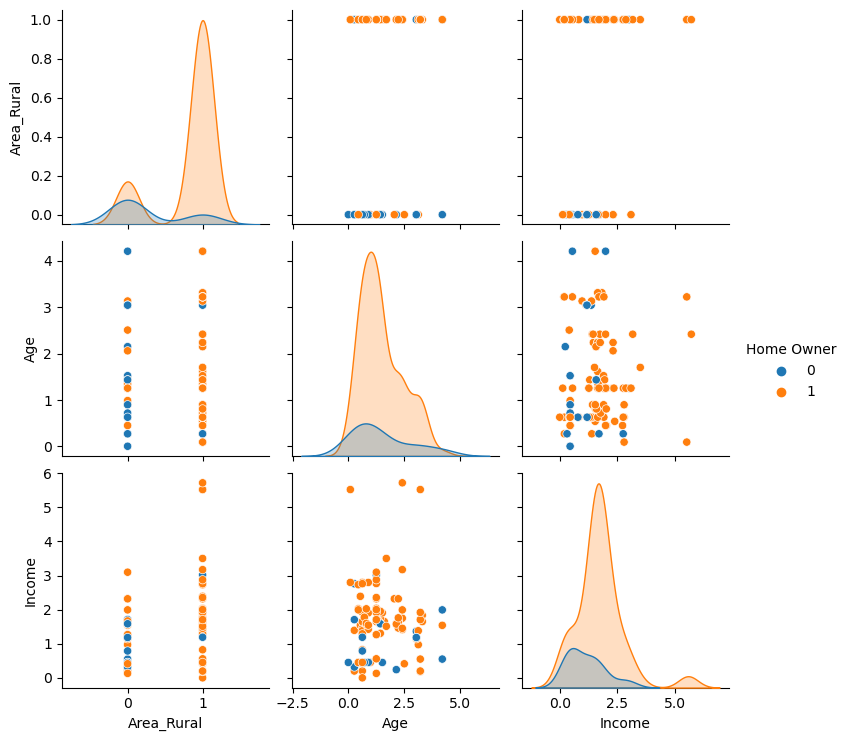

In [295]:
sns.pairplot(df, vars = ['Area_Rural', 'Age', 'Income'], hue = "Home Owner")

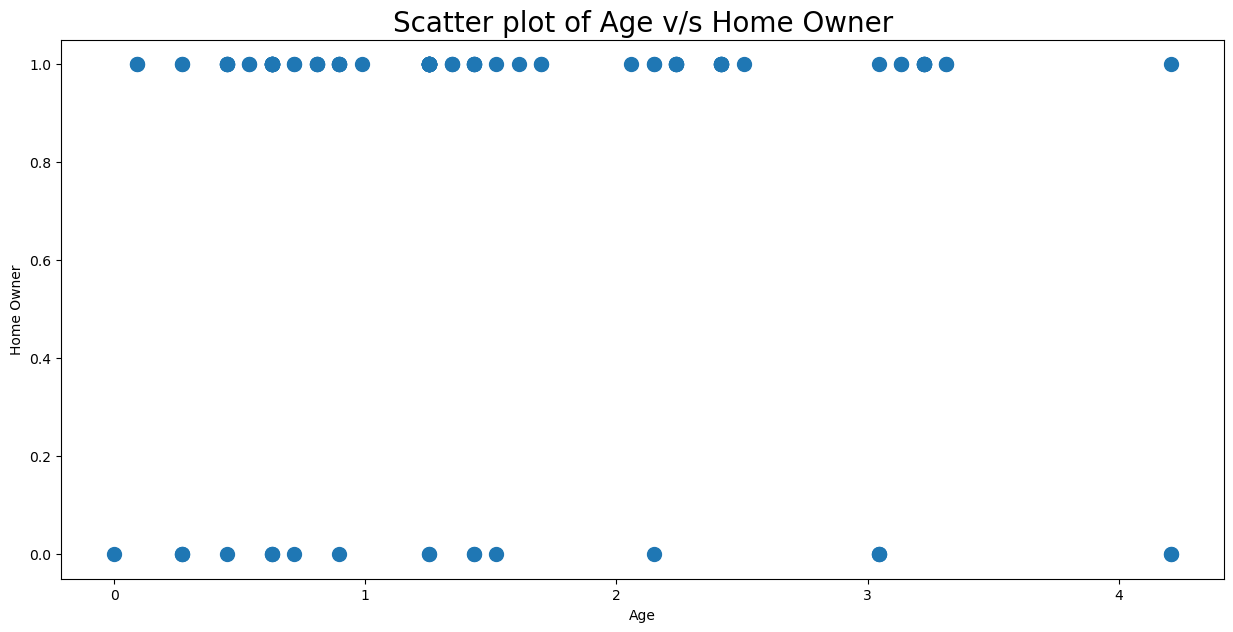

In [296]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Age v/s Home Owner', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Home Owner')
plt.scatter( x = 'Age', y = 'Home Owner', data = df, s = 100)
plt.show()

In [297]:
X1 = df[['Age' , 'Home Owner']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

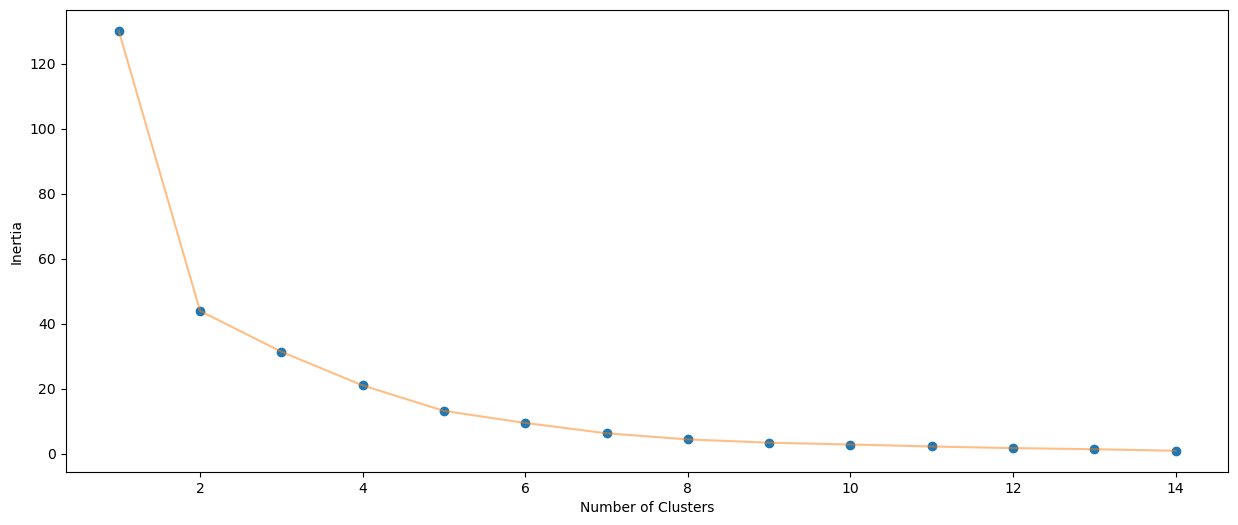

In [298]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [263]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [264]:
h = 0.01
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

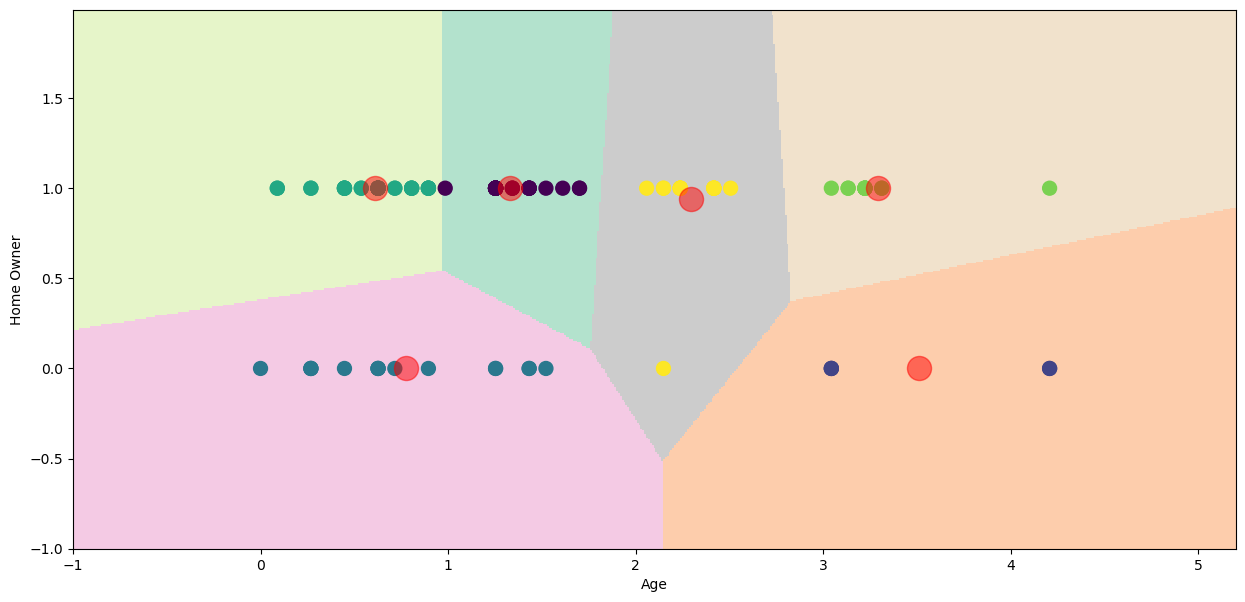

In [265]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Home Owner', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Home Owner') , plt.xlabel('Age')
plt.show()